<a href="https://colab.research.google.com/github/kimimumemo/Computational-Finance-/blob/main/Plotting%20Payoff%20with%20Monte%20Carlo%20Method%20in%20Antithetic%20Variates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import random
import math
import statistics
import matplotlib.pyplot as plt
from scipy.stats import norm

### Simulasikan lintasan dari pergerakan harga saham dari waktu sekarang sampai dengan 𝑇.
(ulangi sebanyak 𝑀 = 100 kali)

In [ ]:
# parameter
s_0 = 10 # nilai awal
X = 9
mu = 0.06 # tingkat suku bunga bebas risiko (laju drift)
sigma = 0.1 # volatilitas
T = 1 # harga saham dalam T tahun
n = 1000
N = 250
sum_tn = T*N
delta_t = T/N
sqrt_delta_t = math.sqrt(delta_t)
M = 100 # banyak iterasi yang dilakukan untuk melihat harga pergerakan saham pada 1 periode
m_mul_n = M*n

mean, std = 0, 1 # mean and standar deviasi

# https://numpy.org/doc/1.21/reference/random/generated/numpy.random.normal.html

In [ ]:
s_zeros = np.zeros((M,N+1))
for i in range(0,M):
  s_zeros[i,0] = s_0

In [ ]:
for i in range(0,M):
  for j in range(1,N+1):
    s_zeros[i,j] = np.exp(((mu-(sigma**2))/2)*delta_t+sigma*np.random.normal(mean, std,1)*sqrt_delta_t)*s_zeros[i,j-1]

In [ ]:
cum = 0
sem_ful = []

for i in range(0,M):
  for j in range(0,N+1):
    cum += s_zeros[i,j]
  sem_ful.append(cum)

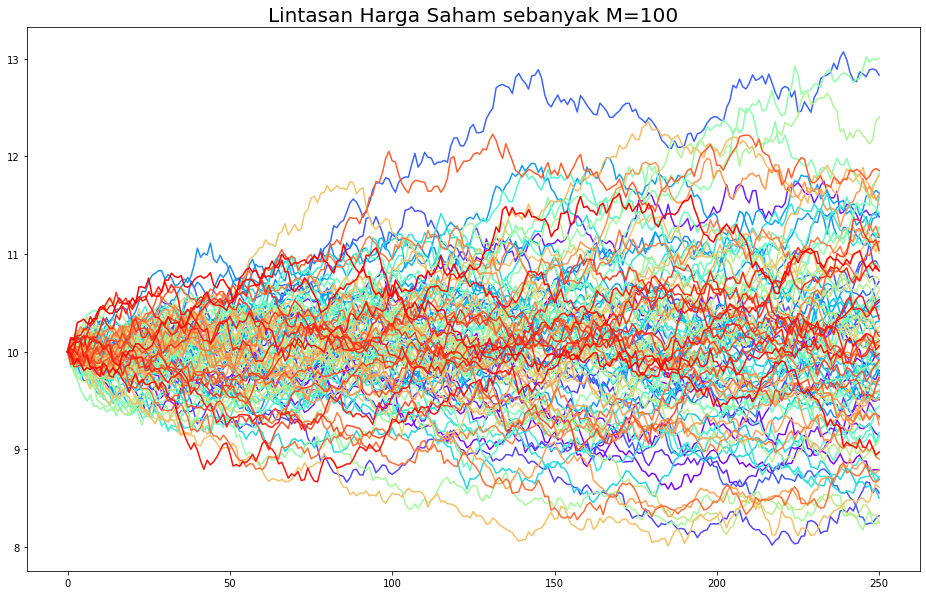

In [ ]:
from matplotlib.pyplot import cm

plt.figure(figsize=(16, 10)) # In this example, all the plots will be in one figure.  
color = iter(cm.rainbow(np.linspace(0, 1, M)))

for i in range(0,M):
  c = next(color)
  plt.plot(range(sum_tn+1), s_zeros[i], c=c)
plt.title('Lintasan Harga Saham sebanyak M=100', fontsize=20)
plt.show()

## Payoff, Ekspektasi, Variansi

In [ ]:
payoff_eropa = []

for i in range(0,M):
  fill_payoff = np.exp(-mu*T)*np.maximum(s_zeros[i,250]-X,0)
  payoff_eropa.append(fill_payoff)
ekspektasi_payoff = 1/M*(sum(payoff_eropa))

In [ ]:
ekspektasi_payoff

1.1195938820896907

In [ ]:
square_disk = []

for i in range(0,M):
  squ_disk = (payoff_eropa[i]-ekspektasi_payoff)**2
  square_disk.append(squ_disk)

In [ ]:
varians_penaksir = 1/(M-1)*(sum(square_disk))
varians_penaksir
# np.sqrt(varians_penaksir)

0.1198092663520924

## Menentukan Harga Opsi Call Eropa dengan Metode MC dengan Teknik Antitetik Variates

In [ ]:
M_new = 500

In [ ]:
s_zeros_AV_pos = np.zeros((M_new, N+1))
for i in range(0,M_new):
  s_zeros_AV_pos[i,0] = s_0

In [ ]:
s_zeros_AV_neg = np.zeros((M_new, N+1))
for i in range(0,M_new):
  s_zeros_AV_neg[i,0] = s_0

In [ ]:
for i in range(0,M_new):
  for j in range(1,N+1):
    random = np.random.normal(mean, std,1)
    s_zeros_AV_pos[i,j] = np.exp(((mu-(sigma**2))/2)*delta_t+sigma*random*sqrt_delta_t)*s_zeros_AV_pos[i,j-1]
    s_zeros_AV_neg[i,j] = np.exp(((mu-(sigma**2))/2)*delta_t+sigma*-1*random*sqrt_delta_t)*s_zeros_AV_neg[i,j-1]

In [ ]:
from matplotlib.pyplot import cm

plt.figure(figsize=(16, 10)) # In this example, all the plots will be in one figure.  
color = iter(cm.rainbow(np.linspace(0, 1, M)))

for i in range(0, M_new):
  plt.plot(range(sum_tn+1), s_zeros_AV_pos[i], c='b')
  plt.plot(range(sum_tn+1), s_zeros_AV_neg[i], c='r')
plt.title('Lintasan Harga Saham sebanyak M=1000 Metode MC dengan Teknik Antitetik', fontsize=20)
plt.show()

grafik, sumbu x, 50, 200, 100, 1 juta